# Perimeter International Scholars, March 21 - April 8 2016
### Explorations in Condensed Matter Theory
# Many-body entanglement and tensor networks
 



Guifre Vidal, Perimeter Institute

# IJulia III: statistical partition function

### Tensors: multi-dimensional arrays

In [1]:
A = ones(2,4,2)  # also: A = zeros(2,4,2), and A = rand(2,4,2)

2x4x2 Array{Float64,3}:
[:, :, 1] =
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0

[:, :, 2] =
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0

In [2]:
B = rand(2,4,2)

2x4x2 Array{Float64,3}:
[:, :, 1] =
 0.894888  0.109811  0.313063  0.678159
 0.29396   0.851036  0.691535  0.329653

[:, :, 2] =
 0.547358  0.618201  0.550433  0.410495
 0.884928  0.789505  0.220537  0.868758

In [3]:
3*A+im*B

2x4x2 Array{Complex{Float64},3}:
[:, :, 1] =
 3.0+0.894888im  3.0+0.109811im  3.0+0.313063im  3.0+0.678159im
 3.0+0.29396im   3.0+0.851036im  3.0+0.691535im  3.0+0.329653im

[:, :, 2] =
 3.0+0.547358im  3.0+0.618201im  3.0+0.550433im  3.0+0.410495im
 3.0+0.884928im  3.0+0.789505im  3.0+0.220537im  3.0+0.868758im

In [4]:
sB = size(B)

(2,4,2)

In [5]:
C = reshape(B, (8, 2))

8x2 Array{Float64,2}:
 0.894888  0.547358
 0.29396   0.884928
 0.109811  0.618201
 0.851036  0.789505
 0.313063  0.550433
 0.691535  0.220537
 0.678159  0.410495
 0.329653  0.868758

In [8]:
D = reshape(C, (2, 4, 2))
B-D
isequal(B,D)
#isequal(B,D+1e-18)

true

## Statistical partition function 
### The ferromagnetic (classical ) Ising model 
$$H = - \sum_{\langle i,j \rangle } \sigma^{(i)} \sigma^{(j)}$$, 
### where $\sigma = \pm 1$, is
$$Z = \sum_{\{\sigma\}} \exp\left(-\frac{H(\{\sigma\})}{T}\right) = \sum_{\{\sigma\}} \exp \left( \frac{1}{T} \sum_{\langle i,j \rangle } \sigma^{(i)} \sigma^{(j)}\right)$$

### Boltzmann weights and critical temperature

In [10]:
Tc = 2/log(1+sqrt(2)) # critical temperature
J = 1
T = Tc

2.269185314213022

### Tensor A

In [12]:
function q(i,j)
    #return 1-2*mod(i+j,2)
    return (-1)^(i+j)
end

A = zeros(2,2,2,2)
for i=1:2
    for j=1:2
        for k=1:2
            for l=1:2
                A[i,j,k,l] = exp( ( q(i,j) + q(j,k) + q(k,l) + q(l,i) )/T )
            end
        end
    end
end

In [13]:
# using list comprehension

B =[ exp( ( q(i,j) + q(j,k) + q(k,l) + q(l,i) )/T ) for i=1:2, j=1:2, k=1:2, l=1:2]

vecnorm(A-B)

0.0

### Transfer matrix of width $N=2$

In [14]:
d=2
AA = zeros(d, d, d, d)
for i=1:d
    for j=1:d
        for k=1:d
            for l=1:d
                for m=1:d
                    for n=1:d
                        AA[j,m,l,n] += A[i, j, k, l]*A[k, m, i, n]
                    end
                end
            end
        end
    end
end
AA = reshape(AA, (d^2, d^2))

4x4 Array{Float64,2}:
 36.0  8.0  8.0   4.0
  8.0  4.0  4.0   8.0
  8.0  4.0  4.0   8.0
  4.0  8.0  8.0  36.0

### Transfer matrix of width N

In [16]:
function growM(M,A)
    sM = size(M) # we assume sM = (dh, dvM, dh, dvM)  
    sA = size(A) #           sA = (dh, dvA, dh, dvA)
    dh = sM[1]
    dvM = sM[2]
    dvA = sA[2]
    MA = zeros((dh, dvM, dvA, dh, dvM, dvA))
    for i=1:dh
        for j=1:dvA
            for k=1:dh
                for l=1:dvA
                    for m=1:dvM
                        for n=1:dh
                            for o=1:dvM
                                MA[i,m, j, n, o, l] += M[k, m, n, o]*A[i, j, k, l]
                            end
                        end
                    end
                end
            end
        end
    end         
    MA = reshape(MA, (dh, dvM*dvA, dh, dvM*dvA))
    return MA
end



growM (generic function with 1 method)

In [17]:
function buildM(A,N)
    M = copy(A)
    for n=2:N
        M = growM(M,A)
    end
    sM = size(M) # sM = (dh, dvM, dh, dvM)
    dh = sM[1]
    dvM = sM[2]
    MM = zeros(dvM,dvM)
    for i=1:dh
        MM += reshape(M[i,:,i,:], (dvM, dvM))
    end
    return MM
end


buildM (generic function with 1 method)

In [18]:
# Translation operator 

function buildT(N) 
    SWAP = [1. 0 0 0; 0 0 1 0; 0 1 0 0; 0 0 0 1]
    I = eye(2)
    T = SWAP
    SWAPn = SWAP
    for i=3:N
        T = kron(T,I)
        SWAPn = kron(I,SWAPn)
        T = T*SWAPn
    end
    return T
end

# Parity operator

function buildZ2(N)
    X = [0 1; 1 0]
    Z2 = X
    for i=2:N
        Z2 = kron(Z2,X)
    end
    return Z2
end


buildZ2 (generic function with 1 method)

In [19]:
N = 10 # size of the spin chain (N not larger than 12)
Nstates = 12
M = buildM(A,N) 
T = buildT(N)
Z2 = buildZ2(N)
D,Psi = eigs(M*T,nev=12);
#D,Psi = eig(M);

In [20]:
W = real(diag(Psi'*M*Psi))
d = -(log(W)-log(W[1]))*N/(2pi)

K = angle(diag(Psi'*T*Psi))
s = K/(2pi)*N

p = diag(Psi'*Z2*Psi)
p = real(round((1-p)/2));

[W K d s p]

12x5 Array{Float64,2}:
 1.22059e8   0.0       -0.0        0.0  -0.0
 1.12857e8   0.0        0.124746   0.0   1.0
 6.49478e7   0.0        1.00414    0.0  -0.0
 5.95732e7   0.628319   1.14161    1.0   1.0
 5.95732e7  -0.628319   1.14161   -1.0   1.0
 3.34353e7   1.25664    2.06088    2.0  -0.0
 3.34353e7  -1.25664    2.06088   -2.0  -0.0
 3.34353e7   0.628319   2.06088    1.0   0.0
 3.34353e7  -0.628319   2.06088   -1.0   0.0
 3.14466e7   0.0        2.15848    0.0   1.0
 2.92995e7   1.25664    2.27103    2.0   1.0
 2.92995e7  -1.25664    2.27103   -2.0   1.0

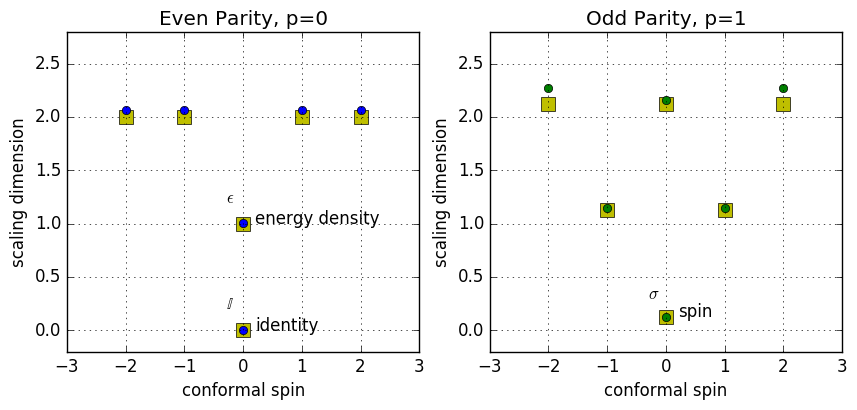

In [21]:
using PyPlot

# Exact solution
Ndim = 12
Delta = [0 1/8 1 1+1/8 1+1/8 2 2 2 2 2+1/8 2+1/8 2+1/8]
spin = [0 0 0 1 -1 2 1 -1 -2 2 0 -2]
parity = [0 1 0 1 1 0 0 0 0 1 1 1]

figure("conformal_data_pbc",figsize=(10,4))

subplot(121) # Create the 1st axis of a 2x2 arrax of axes
grid("on") # Create a grid on the axis
title("Even Parity, p=0")
ax = gca()
ax[:set_xlim]([-3,3])
ax[:set_ylim]([-0.2,2.8])
xlabel("conformal spin")
ylabel("scaling dimension")
annotate("identity", xy=[0.2;0])
annotate(L"$\mathbb{I}$", xy=[-0.3;0.2])
annotate("energy density", xy=[0.2;1])
annotate(L"$\epsilon$", xy=[-0.3;1.2])

subplot(122) # Create the 1st axis of a 2x2 arrax of axes
grid("on") # Create a grid on the axis
title("Odd Parity, p=1")
ax = gca()
ax[:set_xlim]([-3,3])
ax[:set_ylim]([-0.2,2.8])
xlabel("conformal spin")
ylabel("scaling dimension")
annotate("spin", xy=[0.2;1/8])
annotate(L"$\sigma$", xy=[-0.3;0.3])

for i=1:Ndim
    if parity[i] == 0
        subplot(121)
        plot(spin[i],Delta[i], marker = "s", markersize = 10, color = "y")
    elseif parity[i] == 1
        subplot(122)
        plot(spin[i],Delta[i], marker = "s", markersize = 10, color = "y")
    end
end  

for i=1:Nstates
    if p[i] == 0
        subplot(121)
        plot(s[i],d[i], marker = "o", color = "b")
    elseif p[i] == 1
        subplot(122)
        plot(s[i],d[i], marker = "o", color = "g")
    end
end    


### central charge

In [22]:
Nsites = [2,4,6,8,10,12]  # at most 12 sites
qq = zeros(6)
for i=1:6
    @time M = buildM(A,Nsites[i])
    D,V = eigs(M, nev=1)
    qq[i] = D[1]
end


  0.002137 seconds (47 allocations: 3.984 KB)
  0.000069 seconds (27 allocations: 22.406 KB)
  0.000956 seconds (42 allocations: 332.891 KB)
  0.038966 seconds (52 allocations: 5.169 MB)
  0.698393 seconds (72 allocations: 82.670 MB, 1.83% gc time)
 

13.419252 seconds (86 allocations: 1.292 GB, 0.86% gc time)
Estimates cc6 = 0.48417871673144786 and cc2 = 0.49760054424929656 for the central charge c = 0.5

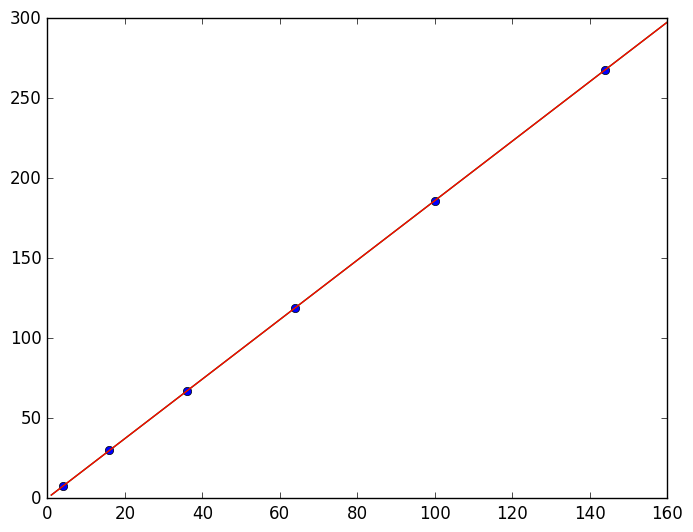

In [23]:
logq = zeros(qq)
for i=1:6
    logq[i] = log(qq[i])*Nsites[i]
end

plot(Nsites.^2, logq, marker="o", linestyle = " ")

# estimate using all system sizes
X=float(Nsites.^2)
a6,b6 = linreg(X,logq)
plot([1:160;], a6+b6*[1:160;], color = "g")
cc6 = a6/2pi*12

# estimate using the largest 3 system sizes
a2,b2 = linreg(X[5:6],logq[5:6])
plot([1:160;], a2+b2*[1:160;], color = "r")
cc2 = a2/2pi*12

println("Estimates cc6 = $cc6 and cc2 = $cc2 for the central charge c = 0.5")

### Conection to the 1D Quantum Ising model

In [24]:
N=10
M = buildM(A,N)
D,Psi = eigs(M, nev=1)
Z = [1 0; 0 -1]
ZZ = kron(Z,Z)
ZZn = kron(ZZ,eye(2^(N-2)))
X = [0 1; 1 0]
Xn = kron(X, eye(2^(N-1)))
EZZ = (Psi'*ZZn*Psi)[1]
EX = (Psi'*Xn*Psi)[1]
E02D = -10*(EZZ+EX) # from transfer matrix
E01D = -12.784906442999329 # from quantum spin chain (tutorial A)
println("Energy of ground state of critical quantum Ising model     = $E01D")
println("Energy of dominant eigenvector of critical transfer matrix = $E02D")
println("They are the same state!")

Energy of ground state of critical quantum Ising model     = -12.784906442999329
Energy of dominant eigenvector of critical transfer matrix = -12.784906442999326
They are the same state!
